# The EDA phase:
**To explore the data and visually review it, and to demonstrate the importance of removing some of it when it is not needed for generating reports from the radiographic image, it is necessary to perform this process to increase understanding of the data used within the project workflow.** 


In [1]:
import os

# المسار الذي زودتني به
folder_path = '/kaggle/input/chest-xrays-indiana-university/images/images_normalized'

# جلب قائمة بأسماء الملفات
files = os.listdir(folder_path)

# طباعة أول 5 ملفات فقط للتجربة
print(f"عدد الملفات الكلي: {len(files)}")
print("أمثلة من الملفات:")
print(files[:5])

عدد الملفات الكلي: 7470
أمثلة من الملفات:
['349_IM-1697-2001.dcm.png', '607_IM-2196-1001.dcm.png', '2832_IM-1249-2001.dcm.png', '699_IM-2263-2001.dcm.png', '1931_IM-0602-2001.dcm.png']


In [2]:
from PIL import Image

# تحديد المسار الكامل لأول صورة في القائمة
sample_image_path = os.path.join(folder_path, files[0])

# فتح الصورة ومعرفة أبعادها
with Image.open(sample_image_path) as img:
    width, height = img.size
    print(f"اname of img: {files[0]}")
    print(f"the resolution of iamges is {width}*{height}")

اname of img: 349_IM-1697-2001.dcm.png
the resolution of iamges is 2048*2496


In [3]:
import pandas as pd

# قم بتغيير المسار للمسار الصحيح لملف الـ CSV لديك
csv_path = '/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv'

# قراءة الملف
df = pd.read_csv(csv_path)

# عرض أسماء الأعمدة كقائمة
print("The columns of indiana_projections.csv table are :")
print(df.columns.tolist())

The columns of indiana_projections.csv table are :
['uid', 'filename', 'projection']


In [4]:
import pandas as pd

# قم بتغيير المسار للمسار الصحيح لملف الـ CSV لديك
csv_path = '/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv'

# قراءة الملف
df = pd.read_csv(csv_path)

# عرض أسماء الأعمدة كقائمة
print("The columns of indiana_reports.csv table are :")

print(df.columns.tolist())

The columns of indiana_reports.csv table are :
['uid', 'MeSH', 'Problems', 'image', 'indication', 'comparison', 'findings', 'impression']


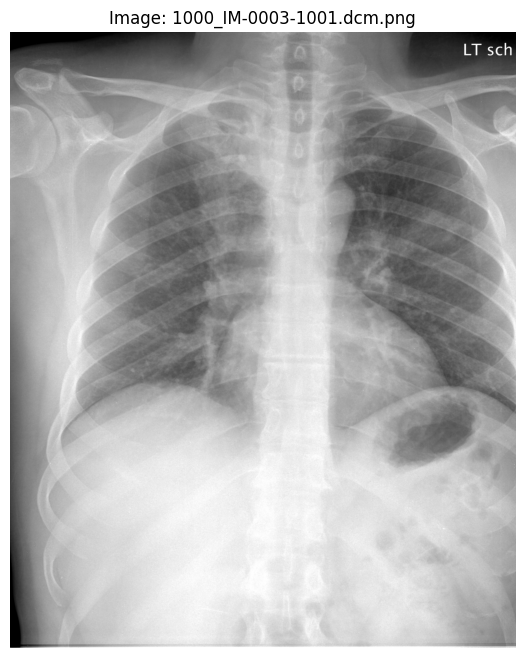

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ضع المسار الكامل للصورة هنا
image_path = '/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1000_IM-0003-1001.dcm.png'

# قراءة الصورة
img = mpimg.imread(image_path)

# عرض الصورة
plt.figure(figsize=(8, 8)) # تحديد حجم العرض
plt.imshow(img, cmap='gray') # استخدم cmap='gray' إذا كانت الصورة أشعة سينية (أسود وأبيض)
plt.title(f"Image: {image_path.split('/')[-1]}") # عرض اسم الملف كعنوان
plt.axis('off') # لإخفاء أرقام المحاور (الطول والعرض)
plt.show()

In [6]:
projections = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")
row = projections[projections["filename"] == "1000_IM-0003-1001.dcm.png"]
print(row)


       uid                   filename projection
1871  1000  1000_IM-0003-1001.dcm.png    Frontal


In [7]:
import pandas as pd

# قراءة البيانات
reports = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")

# إعداد Pandas لعرض النص كاملاً دون تقطيع
pd.set_option('display.max_colwidth', None)

row = reports[reports["uid"] == 1]
display(row)

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.


In [8]:
import pandas as pd
import os

# Base dataset directory
BASE = "/kaggle/input/chest-xrays-indiana-university"

# Image directory
IMG_DIR = f"{BASE}/images/images_normalized"
# Load CSV files
df_proj = pd.read_csv(f"{BASE}/indiana_projections.csv")
df_rep  = pd.read_csv(f"{BASE}/indiana_reports.csv")
# Merge projections with reports using uid
df = df_proj.merge(df_rep, on="uid", how="inner")

# Add full image path
df["image_path"] = df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))
# Keep only rows where image exists
df = df[df["image_path"].apply(os.path.exists)]

# Combine findings + impression into one report text
df["report"] = (
    df["findings"].fillna("") + " " +
    df["impression"].fillna("")
).str.strip()


def clean_text(t):
    if not isinstance(t, str):
        return ""
    t = t.replace("\n", " ").replace("\r", " ")
    t = " ".join(t.split())  # remove extra spaces
    return t

df["report"] = df["report"].apply(clean_text)

print("Total paired samples:", len(df))
df.head(2)



Total paired samples: 7466


,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression,image_path,report
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-3001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.


In [9]:
# حفظ الجدول كملف CSV
df.to_csv('my_processed_data.csv', index=False)

print("تم حفظ الملف بنجاح في مجلد المخرجات!")

تم حفظ الملف بنجاح في مجلد المخرجات!


In [10]:
for col in df.columns:
    print("unique values of columns in df")
    print("="*60)
    print(f"📌 Column: {col}")
    print(df[col].unique())
    print("\n")


unique values of columns in df
📌 Column: uid
[   1    2    3 ... 3997 3998 3999]


unique values of columns in df
📌 Column: filename
['1_IM-0001-4001.dcm.png' '1_IM-0001-3001.dcm.png'
 '2_IM-0652-1001.dcm.png' ... '3998_IM-2048-1002.dcm.png'
 '3999_IM-2049-1001.dcm.png' '3999_IM-2049-2001.dcm.png']


unique values of columns in df
📌 Column: projection
['Frontal' 'Lateral']


unique values of columns in df
📌 Column: MeSH
['normal' 'Cardiomegaly/borderline;Pulmonary Artery/enlarged'
 'Pulmonary Disease, Chronic Obstructive;Bullous Emphysema;Pulmonary Fibrosis/interstitial;Cicatrix/lung/upper lobe/left;Opacity/lung/apex/left/irregular;Opacity/lung/upper lobe/right/streaky;Opacity/pulmonary alveoli;Opacity/lung/bilateral/interstitial/diffuse'
 ... 'Cardiomegaly/mild;Pulmonary Congestion;Heart Failure/mild'
 'Lung/hyperdistention/mild;Diaphragm/bilateral/flattened;Cicatrix/lung/middle lobe/right/mild;Pulmonary Atelectasis/middle lobe/right/mild;Pulmonary Emphysema'
 'Opacity/lung/upper lobe

In [11]:
for col in df.columns:
    print("unique values of columns in df With its repetition  ")
    print("="*60)
    print(f"📌 Column: {col}")
    print(df[col].value_counts())
    print("\n")


unique values of columns in df With its repetition  
📌 Column: uid
uid
1303    5
3566    4
846     4
1525    4
2243    4
       ..
3147    1
3151    1
3160    1
3127    1
3097    1
Name: count, Length: 3851, dtype: int64


unique values of columns in df With its repetition  
📌 Column: filename
filename
3999_IM-2049-2001.dcm.png    1
1_IM-0001-4001.dcm.png       1
1_IM-0001-3001.dcm.png       1
2_IM-0652-1001.dcm.png       1
2_IM-0652-2001.dcm.png       1
                            ..
7_IM-2263-2001.dcm.png       1
8_IM-2333-1001.dcm.png       1
8_IM-2333-2001.dcm.png       1
9_IM-2407-1001.dcm.png       1
9_IM-2407-2001.dcm.png       1
Name: count, Length: 7466, dtype: int64


unique values of columns in df With its repetition  
📌 Column: projection
projection
Frontal    3818
Lateral    3648
Name: count, dtype: int64


unique values of columns in df With its repetition  
📌 Column: MeSH
MeSH
normal                                                                                         

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. حذف الأعمدة غير المهمة
cols_to_drop = [
    "uid",
    "filename",
    "image",
    "comparison",
    "findings",
    "impression"
]

df_clean = df.drop(columns=cols_to_drop)



In [13]:
# حفظ الجدول كملف CSV
df_clean.to_csv('my_important_data.csv', index=False)

print("تم حفظ الملف بنجاح في مجلد المخرجات!")

تم حفظ الملف بنجاح في مجلد المخرجات!


/tmp/ipykernel_24/3477372324.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=labels, palette="viridis")
/tmp/ipykernel_24/3477372324.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=labels, palette="viridis")
/tmp/ipykernel_24/3477372324.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=labels, palette="viridis")
/tmp/ipykernel_24/3477372324.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` a

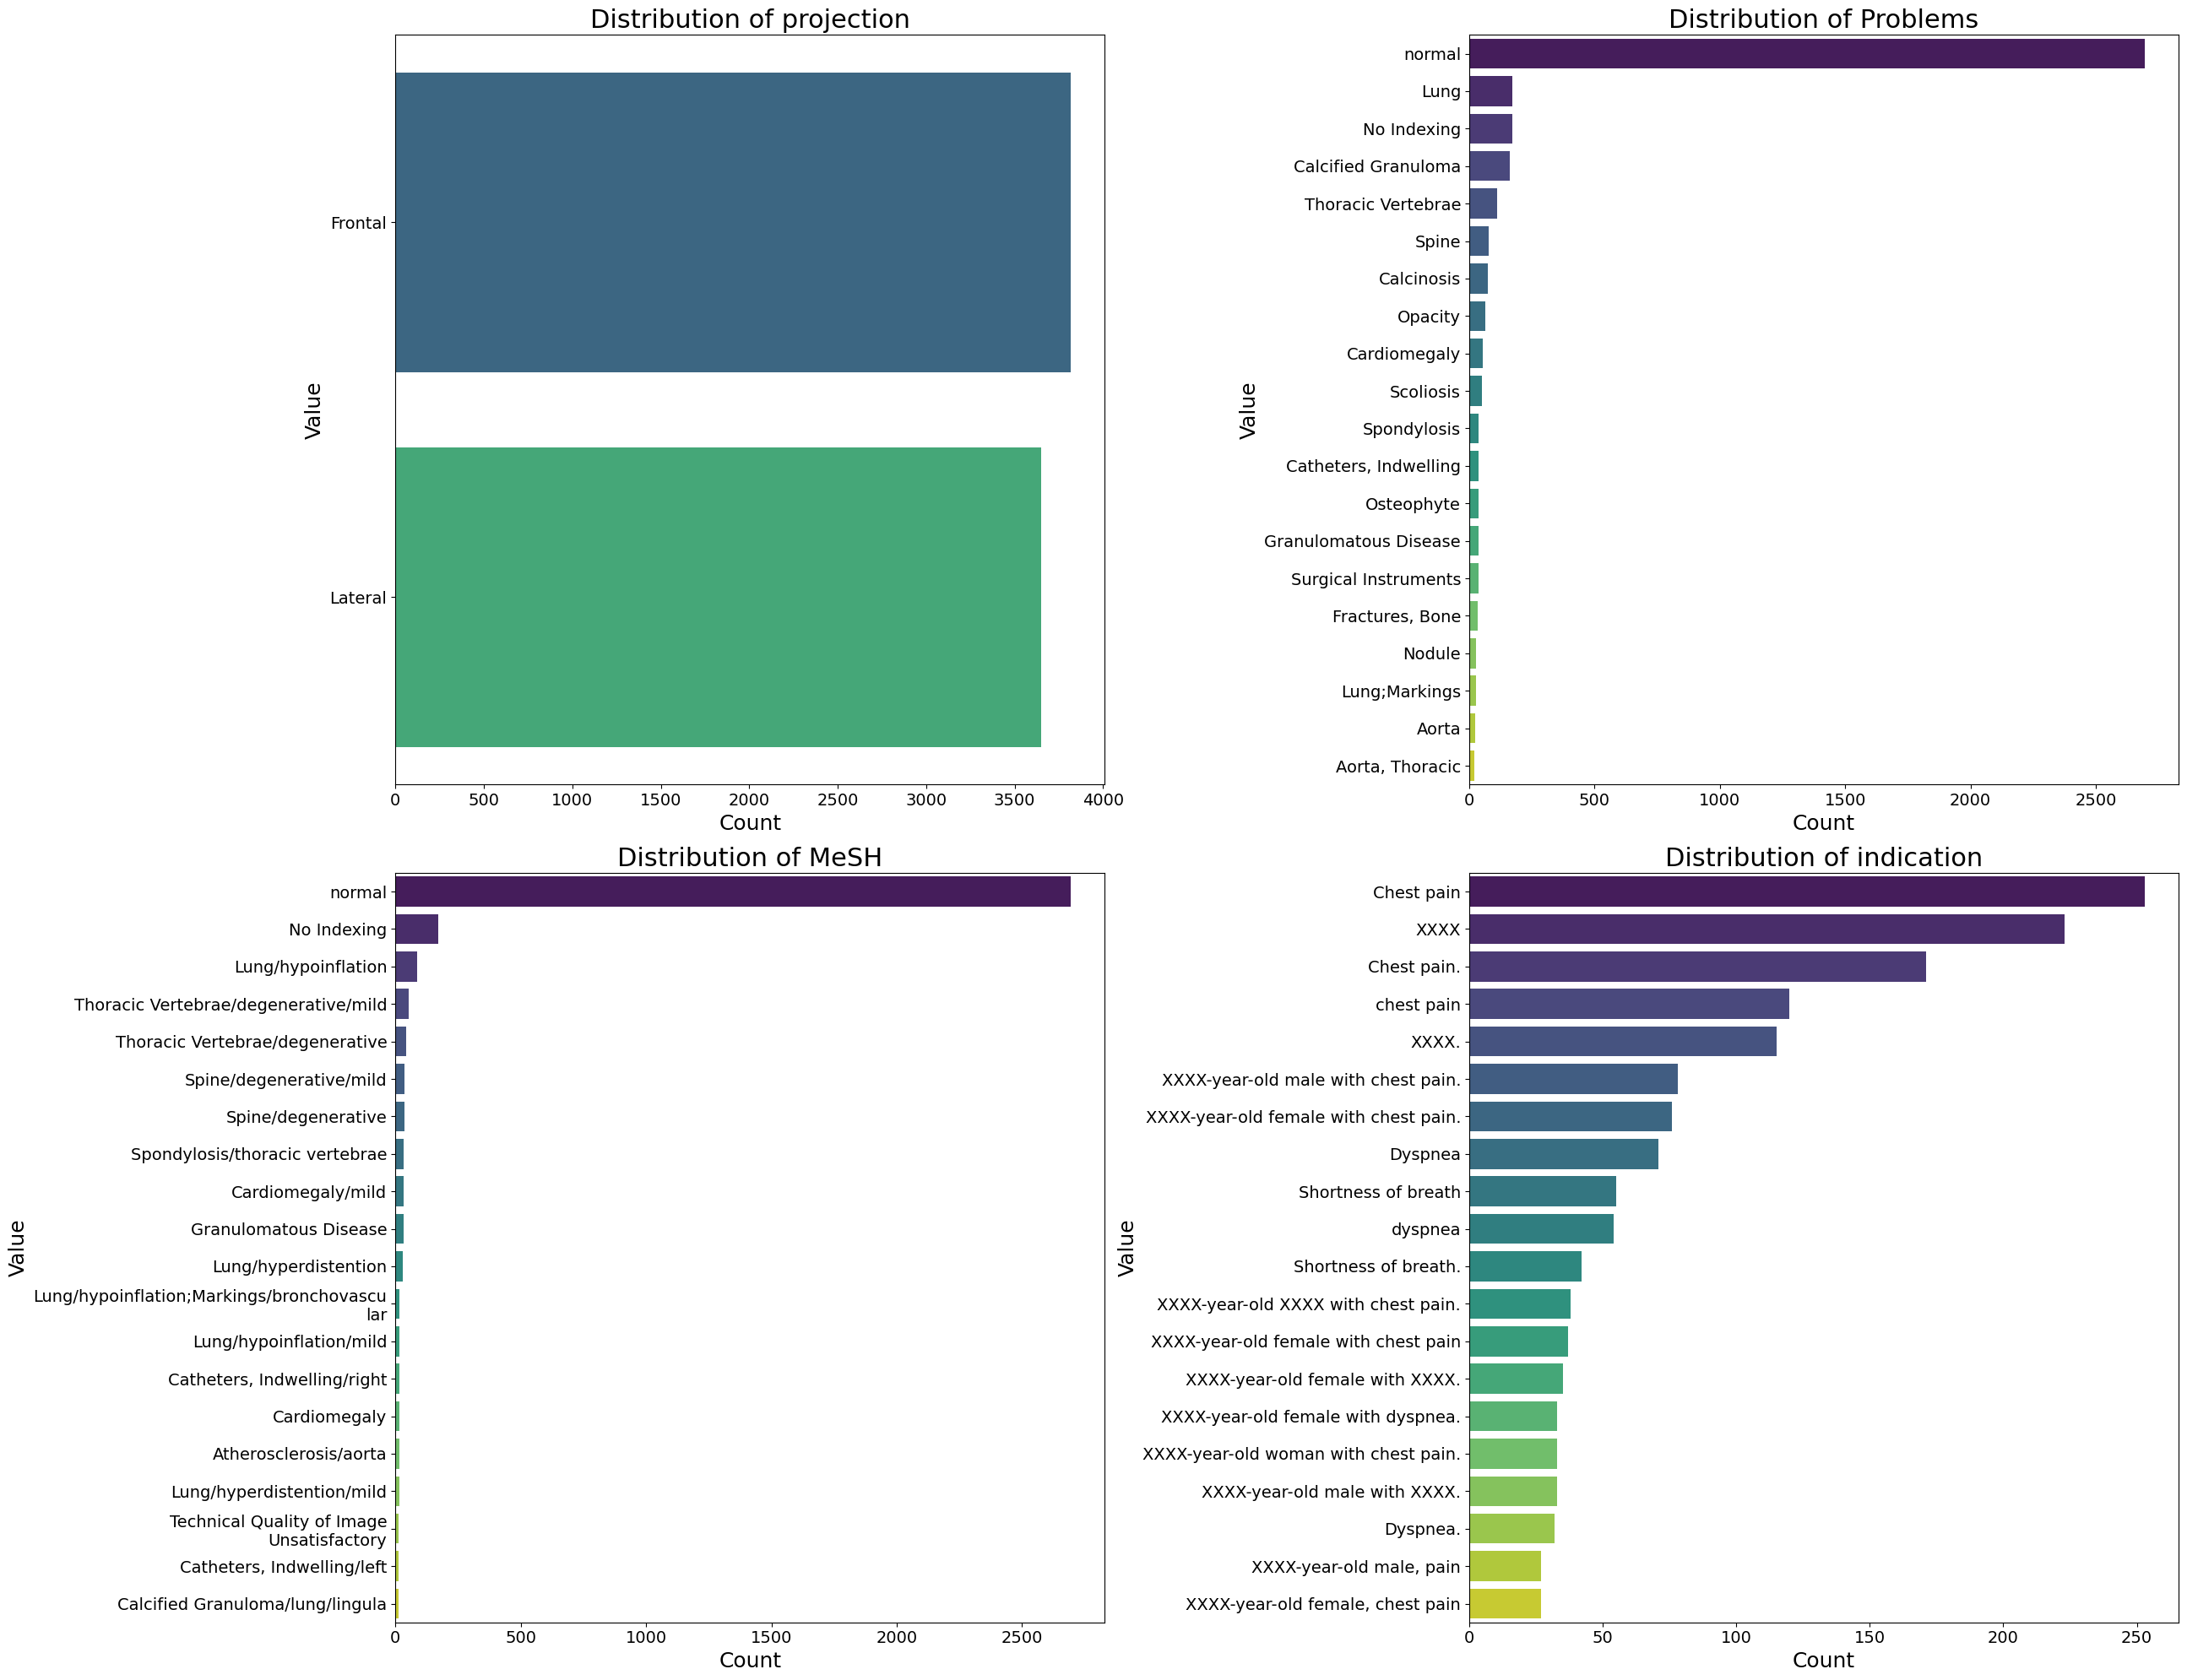

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# الأعمدة الوصفية المهمة
cols_to_plot = ["projection", "Problems", "MeSH", "indication"]

# دالة لتغليف النصوص الطويلة
def wrap_labels(labels, width=40):
    return ['\n'.join(textwrap.wrap(str(l), width)) for l in labels]

plt.figure(figsize=(26, 20))  # حجم ضخم وواضح

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)

    vc = df[col].value_counts().head(20)

    labels = wrap_labels(vc.index)

    sns.barplot(x=vc.values, y=labels, palette="viridis")

    plt.title(f"Distribution of {col}", fontsize=22)
    plt.xlabel("Count", fontsize=18)
    plt.ylabel("Value", fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


In [15]:
df_for_model = df[["image_path", "report", "projection"]].copy()
# حفظ الجدول كملف CSV
df_for_model.to_csv('my_model_data.csv', index=False)

print("تم حفظ الملف بنجاح في مجلد المخرجات!")

تم حفظ الملف بنجاح في مجلد المخرجات!


In [16]:
df_for_model.head(2).style.hide(axis='index')

image_path,report,projection
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.,Frontal
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-3001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.,Lateral


In [17]:
# إظهار تكرار كل نص في عمود التقارير
counts = df_for_model["report"].value_counts()
print(counts)

report
The heart is normal in size. The mediastinum is unremarkable. The lungs are clear. No acute disease.                                                                                                                                                                                                                                                                                                                                                        96
The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal. No active disease.                                                                                                                                                                                                                                                                                                                     95
Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, 

In [18]:
# لنفترض أن اسم العمود هو "report"
print(df_for_model["report"].dtype)
print(df_for_model["projection"].dtype)
print(df_for_model["image_path"].dtype)

object
object
object


In [19]:
df_for_model["report_length"] = df_for_model["report"].apply(lambda x: len(str(x).split()))
df_for_model["report_length"].describe()


count    7466.000000
mean       37.606349
std        20.183631
min         0.000000
25%        24.000000
50%        34.000000
75%        46.000000
max       230.000000
Name: report_length, dtype: float64

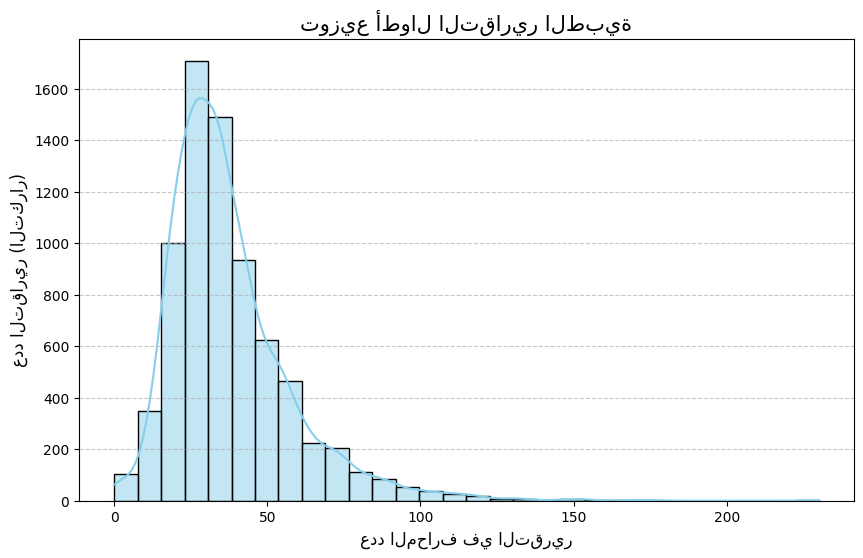

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# ضبط حجم الرسم
plt.figure(figsize=(10, 6))

# رسم المدرج التكراري
sns.histplot(df_for_model["report_length"], bins=30, kde=True, color='skyblue')

# إضافة العناوين
plt.title('توزيع أطوال التقارير الطبية', fontsize=15)
plt.xlabel('عدد المحارف في التقرير', fontsize=12)
plt.ylabel('عدد التقارير (التكرار)', fontsize=12)

# إضافة شبكة خلفية لتسهيل القراءة
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [21]:
# حساب عدد الكلمات (Tokens) لكل تقرير
df_for_model['token_count'] = df_for_model['report'].apply(lambda x: len(str(x).split()))

# عرض إحصائيات سريعة
print(f"أقصى عدد توكنز: {df_for_model['token_count'].max()}")
print(f"متوسط عدد التوكنز: {df_for_model['token_count'].mean():.2f}")

أقصى عدد توكنز: 230
متوسط عدد التوكنز: 37.61


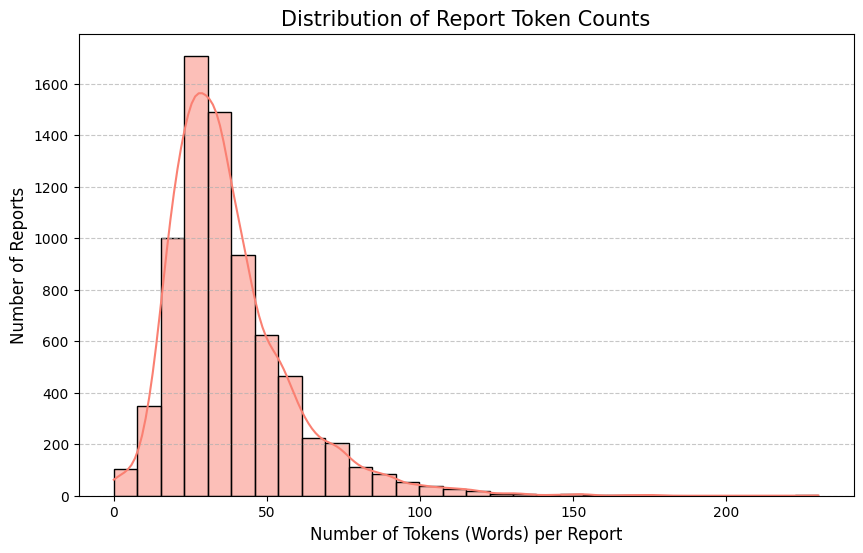

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# رسم المدرج التكراري لعدد التوكنز
sns.histplot(df_for_model["token_count"], bins=30, kde=True, color='salmon')

# إضافة العناوين بالإنجليزية كما طلبت في الكود السابق
plt.title('Distribution of Report Token Counts', fontsize=15)
plt.xlabel('Number of Tokens (Words) per Report', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# preprocessing Dataset
**Performing pre-training operations on all data regardless of their intended use, whether for feature extraction from images from the encoder's side or processing text reports that the decoder will rely on to generate the medical report.**

In [23]:
import os
import random
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms, models

from transformers import (
    AutoTokenizer,
    T5ForConditionalGeneration,
    get_cosine_schedule_with_warmup
)
from transformers.modeling_outputs import BaseModelOutput

from sklearn.model_selection import train_test_split
!pip install sacrebleu

from sacrebleu import corpus_bleu

from tqdm.auto import tqdm

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


2025-12-22 13:49:55.189786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766411395.587457      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766411395.697034      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766411396.724082      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766411396.724148      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766411396.724151      24 computation_placer.cc:177] computation placer alr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.9 MB/s eta 0:00:00
Device: cuda


In [24]:
df = df_for_model.copy()

def clean_text(t):
    t = str(t).strip()
    t = " ".join(t.split())
    return t

df["report"] = df["report"].apply(clean_text)

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42)

print("Train:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))


Train: 5226 Val: 1493 Test: 747


In [25]:
image_size = 224

train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

eval_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

tokenizer = AutoTokenizer.from_pretrained("t5-small")
MAX_LEN = 64


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [26]:
class MedicalReportDataset(Dataset):
    def __init__(self, df, tokenizer, transform, max_len=96):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.transform = transform
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        image = Image.open(row["image_path"]).convert("RGB")
        image = self.transform(image)

        text = row["report"]

        tok = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        input_ids = tok["input_ids"].squeeze(0)
        attn = tok["attention_mask"].squeeze(0)

        labels = input_ids.clone()
        labels[labels == tokenizer.pad_token_id] = -100

        return {
            "image": image,
            "labels": labels,
            "decoder_attention_mask": attn,
            "report_text": text
        }


In [27]:
batch_size = 32

train_dataset = MedicalReportDataset(train_df, tokenizer, train_transform)
val_dataset   = MedicalReportDataset(val_df,   tokenizer, eval_transform)
test_dataset  = MedicalReportDataset(test_df,  tokenizer, eval_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=4)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=4)


In [28]:
class HybridVisionEncoder(nn.Module):
    def __init__(self, embed_dim=768, dropout=0.1, num_heads=8):
        super().__init__()

        # -------------------------
        # 1) ResNet-50 backbone
        # -------------------------
        resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
        self.resnet_feat = nn.Sequential(*list(resnet.children())[:-2])  # [B, 2048, H/32, W/32]
        self.resnet_pool = nn.AdaptiveAvgPool2d((7, 7))
        self.resnet_proj = nn.Linear(2048, embed_dim)

        # -------------------------
        # 2) ViT-B/16 backbone
        # -------------------------
        self.vit = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
        self.vit_head = nn.Identity()  # remove classifier

        # -------------------------
        # 3) Cross Attention Fusion
        # -------------------------
        self.cross_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(embed_dim, embed_dim)
        )
        self.ln1 = nn.LayerNorm(embed_dim)
        self.ln2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        B = x.size(0)

        # -------------------------
        # ResNet features
        # -------------------------
        r = self.resnet_feat(x)               # [B, 2048, H/32, W/32]
        r = self.resnet_pool(r)               # [B, 2048, 7, 7]
        r = r.flatten(2).transpose(1, 2)      # [B, 49, 2048]
        r = self.resnet_proj(r)               # [B, 49, 768]

        # -------------------------
        # ViT features
        # -------------------------
        v = self.vit._process_input(x)        # patchify
        B, T, E = v.shape
        cls = self.vit.class_token.expand(B, -1, -1)
        v = torch.cat((cls, v), dim=1)
        v = v + self.vit.encoder.pos_embedding
        v = self.vit.encoder.dropout(v)
        v = self.vit.encoder.layers(v)
        v = self.vit.encoder.ln(v)            # [B, 197, 768]

        # -------------------------
        # Cross Attention Fusion
        # -------------------------
        attn_out, _ = self.cross_attn(r, v, v)
        r = self.ln1(r + attn_out)
        ffn_out = self.ffn(r)
        out = self.ln2(r + ffn_out)

        return out  # [B, seq_len, 768]


In [29]:
class VisionT5Model(nn.Module):
    def __init__(self, embed_dim=768):
        super().__init__()
        self.vision = HybridVisionEncoder(embed_dim)
        self.t5 = T5ForConditionalGeneration.from_pretrained("t5-small")

        if self.t5.config.d_model != embed_dim:
            self.proj = nn.Linear(embed_dim, self.t5.config.d_model)
        else:
            self.proj = nn.Identity()

    def forward(self, images, labels=None, decoder_attention_mask=None):
        vis = self.vision(images)
        vis = self.proj(vis)
        enc = BaseModelOutput(last_hidden_state=vis)

        out = self.t5(
            encoder_outputs=enc,
            labels=labels,
            decoder_attention_mask=decoder_attention_mask
        )
        return out

    def generate(self, images, max_length=96):
        with torch.no_grad():
            vis = self.vision(images)
            vis = self.proj(vis)
            enc = BaseModelOutput(last_hidden_state=vis)
            ids = self.t5.generate(
                encoder_outputs=enc,
                max_length=max_length,
                num_beams=3
            )
        return ids


In [30]:
model = VisionT5Model().to(device)

for p in model.vision.resnet_feat.parameters():
    p.requires_grad = False
for p in model.vision.vit.parameters():
    p.requires_grad = False

def unfreeze_last_blocks(model):
    print("Unfreezing last blocks...")
    for name, module in model.vision.resnet_feat.named_children():
        if name in ["6", "7"]:
            for p in module.parameters():
                p.requires_grad = True

    for blk in model.vision.vit.encoder.layers[-3:]:
        for p in blk.parameters():
            p.requires_grad = True


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 194MB/s]


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:01<00:00, 236MB/s]


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [31]:
num_epochs = 50
lr = 3e-4
wd = 1e-4

params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.AdamW(params, lr=lr, weight_decay=wd)

steps = num_epochs * len(train_loader)
warmup = int(0.1 * steps)

scheduler = get_cosine_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup,
    num_training_steps=steps
)


In [32]:
def compute_bleu(model, dataloader):
    model.eval()
    gens = []
    refs = []

    with torch.no_grad():
        for batch in dataloader:
            imgs = batch["image"].to(device)
            texts = batch["report_text"]

            # استخراج ميزات الرؤية
            vis = model.vision(imgs)
            vis = model.proj(vis)
            enc = BaseModelOutput(last_hidden_state=vis)

            # التوليد الصحيح
            ids = model.t5.generate(
                encoder_outputs=enc,
                max_length=MAX_LEN,
                num_beams=3,
                early_stopping=True
            )

            for i in range(len(texts)):
                gen = tokenizer.decode(ids[i], skip_special_tokens=True).strip()
                if len(gen) == 0:
                    gen = "<EMPTY>"

                gens.append(gen)
                refs.append([texts[i]])

    bleu = corpus_bleu(gens, refs).score
    return bleu



def train_one_epoch(model, loader, optimizer, scheduler):
    model.train()
    total = 0

    for batch in tqdm(loader, desc="Training"):
        imgs = batch["image"].to(device)
        labels = batch["labels"].to(device)
        attn = batch["decoder_attention_mask"].to(device)

        optimizer.zero_grad()
        out = model(imgs, labels, attn)
        loss = out.loss
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        total += loss.item()

    return total / len(loader)


def eval_one_epoch(model, loader):
    model.eval()
    total = 0

    with torch.no_grad():
        for batch in tqdm(loader, desc="Validation"):
            imgs = batch["image"].to(device)
            labels = batch["labels"].to(device)
            attn = batch["decoder_attention_mask"].to(device)

            out = model(imgs, labels, attn)
            total += out.loss.item()

    return total / len(loader)


In [33]:
train_losses = []
val_losses = []
# train_bleus = []
# val_bleus = []
lrs = []

best_val = float("inf")
save_path = "best_model.pt"

for epoch in range(1, num_epochs+1):
    print(f"\nEpoch {epoch}/{num_epochs}")

    if epoch == 4:
        unfreeze_last_blocks(model)
        params = [p for p in model.parameters() if p.requires_grad]
        optimizer = torch.optim.AdamW(params, lr=lr*0.5, weight_decay=wd)

    train_loss = train_one_epoch(model, train_loader, optimizer, scheduler)
    val_loss = eval_one_epoch(model, val_loader)

    # train_bleu = compute_bleu(model, train_loader)
    # val_bleu = compute_bleu(model, val_loader)

    lr_now = optimizer.param_groups[0]["lr"]

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    # train_bleus.append(train_bleu)
    # val_bleus.append(val_bleu)
    lrs.append(lr_now)

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    # print(f"Train BLEU: {train_bleu:.2f} | Val BLEU: {val_bleu:.2f}")
    print(f"LR: {lr_now:.6f}")

    if val_loss < best_val:
        best_val = val_loss
        torch.save(model.state_dict(), save_path)
        print("Saved best model.")



Epoch 1/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 6.4450 | Val Loss: 3.5112
LR: 0.000060
Saved best model.

Epoch 2/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 3.0885 | Val Loss: 2.2832
LR: 0.000120
Saved best model.

Epoch 3/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 2.3301 | Val Loss: 1.8698
LR: 0.000180
Saved best model.

Epoch 4/50
Unfreezing last blocks...


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 2.1735 | Val Loss: 1.6643
LR: 0.000150
Saved best model.

Epoch 5/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Train Loss: 1.7981 | Val Loss: 1.5226
LR: 0.000150
Saved best model.

Epoch 6/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.6683 | Val Loss: 1.4259
LR: 0.000150
Saved best model.

Epoch 7/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.5703 | Val Loss: 1.3507
LR: 0.000150
Saved best model.

Epoch 8/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.4872 | Val Loss: 1.2988
LR: 0.000150
Saved best model.

Epoch 9/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.4194 | Val Loss: 1.2724
LR: 0.000150
Saved best model.

Epoch 10/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.3535 | Val Loss: 1.2395
LR: 0.000150
Saved best model.

Epoch 11/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.2955 | Val Loss: 1.1942
LR: 0.000150
Saved best model.

Epoch 12/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.2382 | Val Loss: 1.1744
LR: 0.000150
Saved best model.

Epoch 13/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.1807 | Val Loss: 1.1838
LR: 0.000150

Epoch 14/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.1203 | Val Loss: 1.1861
LR: 0.000150

Epoch 15/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.0622 | Val Loss: 1.1540
LR: 0.000150
Saved best model.

Epoch 16/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.0070 | Val Loss: 1.1592
LR: 0.000150

Epoch 17/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.9474 | Val Loss: 1.1622
LR: 0.000150

Epoch 18/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
Exception ignored in:     self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
    Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__

      self._shutdown_workers()
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
       if w.is_alive():
   ^^ ^ ^ ^ ^ ^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
 ^ ^ ^ 
   File "/usr/lib/p

Train Loss: 0.8881 | Val Loss: 1.1840
LR: 0.000150

Epoch 19/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.8401 | Val Loss: 1.1752
LR: 0.000150

Epoch 20/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
  Exception ignored in:   <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0> 
  Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
^^    ^^self._shutdown_workers()^
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    ^^if w.is_alive():^
^ ^ ^  
   ^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
^ ^   ^^  ^^  ^^  ^ ^^^
^  File "/u

Train Loss: 0.7879 | Val Loss: 1.2110
LR: 0.000150

Epoch 21/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.7417 | Val Loss: 1.2526
LR: 0.000150

Epoch 22/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6955 | Val Loss: 1.2549
LR: 0.000150

Epoch 23/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6550 | Val Loss: 1.2667
LR: 0.000150

Epoch 24/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0> 
  Traceback (most recent call last):
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
^    self._shutdown_workers()^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
^^    if w.is_alive():^^
^ ^ ^ 
    File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
     assert self._parent_pid == os.getpid(), 'can only test a child process' 
^^ ^ ^ ^ ^^ ^ ^^^ ^ 
    File "/usr/

Train Loss: 0.6121 | Val Loss: 1.3037
LR: 0.000150

Epoch 25/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.5805 | Val Loss: 1.3213
LR: 0.000150

Epoch 26/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    self._shutdown_workers()    if w.is_alive():

   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
       if w.is_alive():   
 ^ ^ ^ ^ ^^ ^ ^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^^    ^^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^  
  File "/usr/lib/pyth

Train Loss: 0.5446 | Val Loss: 1.3321
LR: 0.000150

Epoch 27/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.5140 | Val Loss: 1.3669
LR: 0.000150

Epoch 28/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>if w.is_alive():

Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
         self._shutdown_workers()
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
^    ^^if w.is_alive():
^ ^ ^ ^ ^ ^^ ^^
   File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    assert self._parent_pid == os.getpid(), 'can only test a child process'
^^  ^ ^ ^  ^ ^ ^ ^ ^ ^^^^
  File "/

Train Loss: 0.4840 | Val Loss: 1.3866
LR: 0.000150

Epoch 29/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.4602 | Val Loss: 1.4223
LR: 0.000150

Epoch 30/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.4344 | Val Loss: 1.4385
LR: 0.000150

Epoch 31/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
Exception ignored in:     self._shutdown_workers()
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
        self._shutdown_workers()if w.is_alive():
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers

     if w.is_alive():
            ^^^ ^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
^   ^^^^  ^^  
     File "/usr/

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.4128 | Val Loss: 1.4177
LR: 0.000150

Epoch 32/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()Exception ignored in: 
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>if w.is_alive():

 Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
      self._shutdown_workers()
     File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
     if w.is_alive():
^^ ^   ^  ^ ^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^^    assert self._parent_pid == os.getpid(), 'can only test a child process'^

  File "/usr/lib/python

Train Loss: 0.3921 | Val Loss: 1.4459
LR: 0.000150

Epoch 33/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.3717 | Val Loss: 1.4834
LR: 0.000150

Epoch 34/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.3544 | Val Loss: 1.4979
LR: 0.000150

Epoch 35/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.3363 | Val Loss: 1.5373
LR: 0.000150

Epoch 36/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.3200 | Val Loss: 1.5231
LR: 0.000150

Epoch 37/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.3060 | Val Loss: 1.5444
LR: 0.000150

Epoch 38/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^Exception ignored in: ^^<function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>^^^
^^Traceback (most recent call last):
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
^    ^self._shutdown_workers()^

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
        if w.is_alive():
assert self._parent_pid == os.getpid(), 'can only test a child process' 
             ^  ^^ ^^ ^^^^^^^^^^^^^
^  Fil

Train Loss: 0.2935 | Val Loss: 1.5687
LR: 0.000150

Epoch 39/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2775 | Val Loss: 1.5764
LR: 0.000150

Epoch 40/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2704 | Val Loss: 1.6060
LR: 0.000150

Epoch 41/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
Exception ignored in:     if w.is_alive():
 <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
  Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
   ^^    ^^self._shutdown_workers()^
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
^    if w.is_alive():^
^^^  ^
   File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
     assert self._parent_pid == os.getpid(), 'can only test a child process' 
     ^   ^ ^^  ^ ^ ^^^^^^^^^^^^^
^  Fi

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2588 | Val Loss: 1.6266
LR: 0.000150

Epoch 42/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers

Traceback (most recent call last):
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
if w.is_alive():    
self._shutdown_workers() 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
     if w.is_alive():  
    ^ ^  ^^  ^^^^^^^^^^^^^
^^^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    assert self._parent_pid == os.getpid(), 'can only test a child process'^^
^ 
  File "/usr/lib/pytho

Train Loss: 0.2491 | Val Loss: 1.6135
LR: 0.000150

Epoch 43/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2398 | Val Loss: 1.6350
LR: 0.000150

Epoch 44/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2256 | Val Loss: 1.6353
LR: 0.000150

Epoch 45/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2200 | Val Loss: 1.6725
LR: 0.000150

Epoch 46/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2145 | Val Loss: 1.6864
LR: 0.000150

Epoch 47/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d83f177dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.2043 | Val Loss: 1.6541
LR: 0.000150

Epoch 48/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.1973 | Val Loss: 1.7256
LR: 0.000150

Epoch 49/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.1885 | Val Loss: 1.7089
LR: 0.000150

Epoch 50/50


Training:   0%|          | 0/164 [00:00<?, ?it/s]

Validation:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.1833 | Val Loss: 1.7319
LR: 0.000150


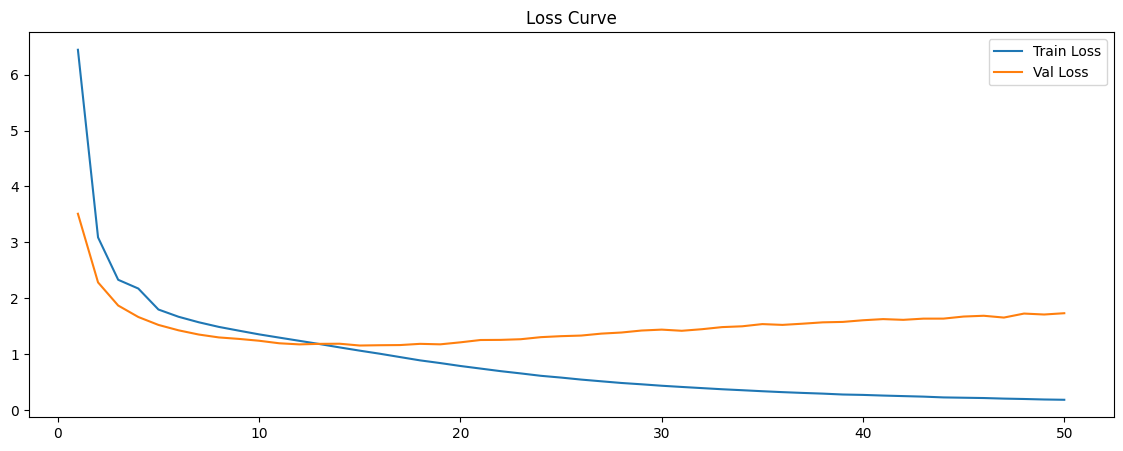

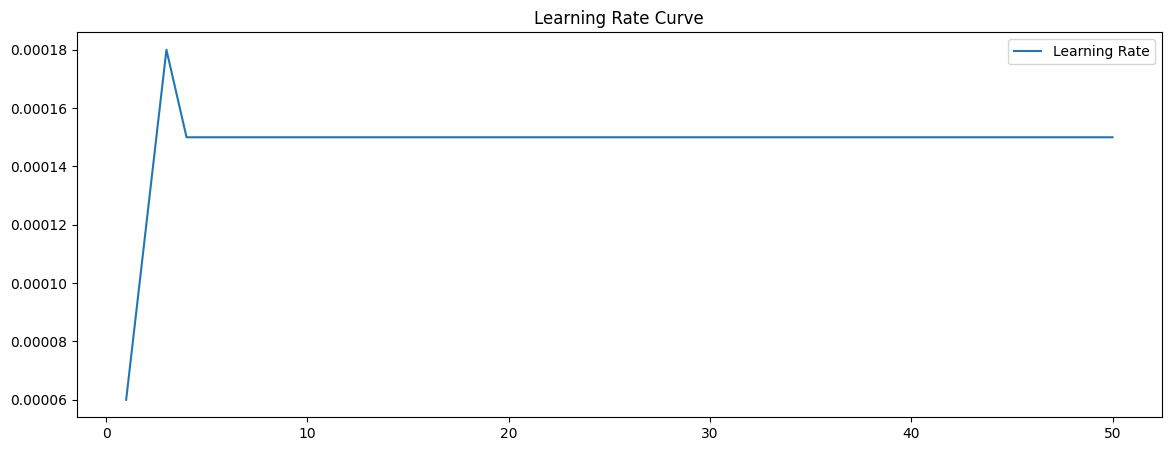

In [34]:
epochs = range(1, num_epochs+1)

plt.figure(figsize=(14,5))
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

# plt.figure(figsize=(14,5))
# plt.plot(epochs, train_bleus, label="Train BLEU")
# plt.plot(epochs, val_bleus, label="Val BLEU")
# plt.legend()
# plt.title("BLEU Curve")
# plt.show()

plt.figure(figsize=(14,5))
plt.plot(epochs, lrs, label="Learning Rate")
plt.legend()
plt.title("Learning Rate Curve")
plt.show()


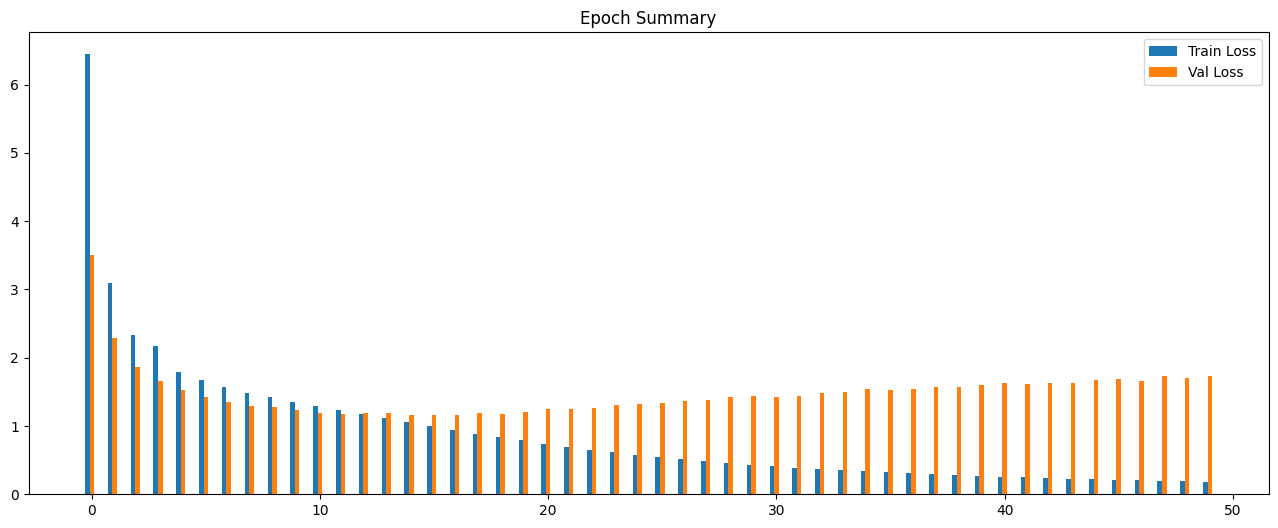

In [35]:
import numpy as np

x = np.arange(num_epochs)
width = 0.2

plt.figure(figsize=(16,6))
plt.bar(x - width, train_losses, width, label="Train Loss")
plt.bar(x, val_losses, width, label="Val Loss")
# plt.bar(x + width, val_bleus, width, label="Val BLEU")
plt.legend()
plt.title("Epoch Summary")
plt.show()


In [36]:
model.load_state_dict(torch.load(save_path))
# بعد انتهاء التدريب
model.load_state_dict(torch.load("best_model.pt"))

# تقييم قسم الاختبار
print("\n=== Test Evaluation ===")
test_loss = eval_one_epoch(model, test_loader)
test_bleu = compute_bleu(model, test_loader)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test BLEU: {test_bleu:.2f}")

model.eval()

def generate_samples(model, loader, n=5):
    gens = []
    refs = []

    with torch.no_grad():
        for batch in loader:
            imgs = batch["image"].to(device)
            texts = batch["report_text"]

            ids = model.generate(imgs)
            for i in range(len(texts)):
                gen = tokenizer.decode(ids[i], skip_special_tokens=True)
                gens.append(gen)
                refs.append(texts[i])

                if len(gens) >= n:
                    return gens, refs

    return gens, refs

g, r = generate_samples(model, test_loader, 5)

for i in range(5):
    print(f"\nSample {i+1}")
    print("Generated:", g[i])
    print("Reference:", r[i])



=== Test Evaluation ===


Validation:   0%|          | 0/24 [00:00<?, ?it/s]

Test Loss: 1.1403
Test BLEU: 100.00

Sample 1
Generated: The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effusion.. Cardio mediastinal silhouette is unremarkable. Visualized osseous structures of the thorax are without acute abnormality. No acute cardiopulmonary abnormality.
Reference: No active disease.

Sample 2
Generated: Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses. Normal chest
Reference: The lungs and pleural spaces show no acute abnormality. Heart size and pulmonary vascularity within normal limits. 1. No acute pulmonary abnormality.

Sample 3
Generated: Heart size within normal limits, stable mediastinal and hilar contours. No focal alveolar consolidation, no definite pleural effusion seen. No typical findings of pulmonary edema. No pneumothorax. No acute findings
Reference: Lungs are overall hyperexpanded with flattening of the diaphra

# ترجمة تقارير الأشعة الصدرية

| العينة | النص المولد (Generated) | النص المرجعي (Reference) |
| :--- | :--- | :--- |
| **العينة 1** | الرئتان صافيتان في الجهتين. لا يوجد دليل على تدمج بؤري، أو استرواح صدر، أو انصباب جنبي. خيال القلب والمنصف طبيعي. الهياكل العظمية الصدرية سليمة. لا توجد نتائج قلبية رئوية حادة. | لا توجد علامات لمرض نشط. |
| **العينة 2** | حجم القلب طبيعي. الرئتان صافيتان. (XXXX) طبيعية. لا يوجد التهاب رئوي، انصباب، وذمة، استرواح صدر، اعتلال غدي، أو كتل. الصدر طبيعي. | الرئتان والحيِّز الجنبي لا يظهران أي اعتلال حاد. حجم القلب والأوعية الرئوية طبيعي. لا يوجد اعتلال رئوي حاد. |
| **العينة 3** | حجم القلب طبيعي مع استقرار معالم المنصف. لا تدمج سنخي أو انصباب جنبي. لا توجد نتائج لوذمة رئوية أو استرواح صدر. لا توجد نتائج حادة. | تمدد مفرط للرئتين مع تسطح الحجاب الحاجز. الرئتان صافيتان. لا انصباب أو استرواح صدر. تغيرات تنكسية بالعمود الفقري وتغيرات توسعية بالترقوة اليمنى (ورم نخاعي متعدد). |
| **العينة 4** | القلب والرئتان (XXXX) في الفترة الحالية. الرئتان صافيتان ومتمددتان. القلب والمنصف طبيعيان. لا يوجد مرض نشط. | القلب طبيعي. الأورطي متعرج ومتوسع. الرئتان صافيتان دون عتامة بؤرية أو انصباب أو استرواح صدر. العظام سليمة. لا نتائج حادة. |
| **العينة 5** | القلب طبيعي الحجم. المنصف طبيعي. الرئتان صافيتان. لا انصباب جنبي أو استرواح صدر. (XXXX) سليمة. لا اعتلالات قلبية رئوية حادة. | تضخم مستقر في القلب دون وذمة ظاهرة. لا مرض بؤري في الرئة. لا انصباب جنبي كبير أو استرواح صدر. (XXXX) سليمة. |

---
